# Data Import

In [181]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("Loan_Data.csv")

In [4]:
data

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

## Getting insights on the data frame

In [5]:
data.shape

(614, 13)

In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
(data.isna().sum()/data.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

##### The percentage of n/a's for the column credit_history and self employed is quite high

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### It can be deduced that the Loan_status is the target variable

In [9]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

###### The mean for credit history (0.84) is very close to the maximum of the column (1), So need to check out credit history as it has the highest percentage of NA values (~8%) and the data seems discret

# Standardizing the columns

In [10]:
data.columns = data.columns.str.lower()

In [11]:
data

loan_id  gender married dependents     education self_employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     credit_history property_area loan_status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

# EDA

In [12]:
for col in data.select_dtypes('object'):
    print (col+'\n'+str(data[col].value_counts()), '\n')

loan_id
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: loan_id, Length: 614, dtype: int64 

gender
Male      489
Female    112
Name: gender, dtype: int64 

married
Yes    398
No     213
Name: married, dtype: int64 

dependents
0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64 

education
Graduate        480
Not Graduate    134
Name: education, dtype: int64 

self_employed
No     500
Yes     82
Name: self_employed, dtype: int64 

property_area
Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64 

loan_status
Y    422
N    192
Name: loan_status, dtype: int64 



In [208]:
data['credit_history'].value_counts()

1.0    475
0.0     89
Name: credit_history, dtype: int64

###### It is clear that credit history is a discrete data is heavy skewed towards 1

###### It can be seen that: 
1. Loan_ID is unique
2. The data set is heavily skewed towards Male
3. skewed towards married people
4. skewed towards people with 0 dependents
5. skewed towards Graduates
6. skewed towards self_employed
7. target variable i.e loan status is skewed towards 'Yes'

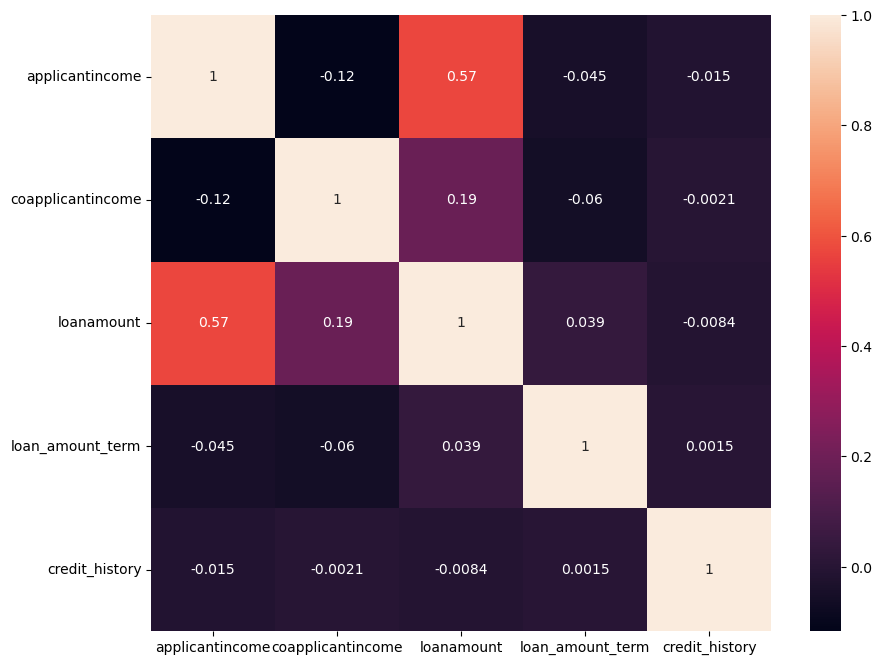

In [74]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

###### No multicollinearity

### Lets check for a relationship between numerical data and the target variable

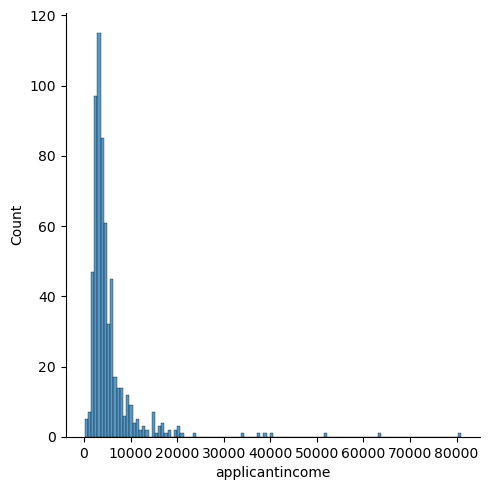

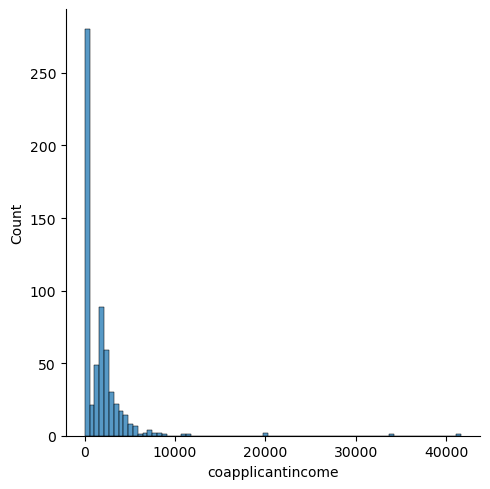

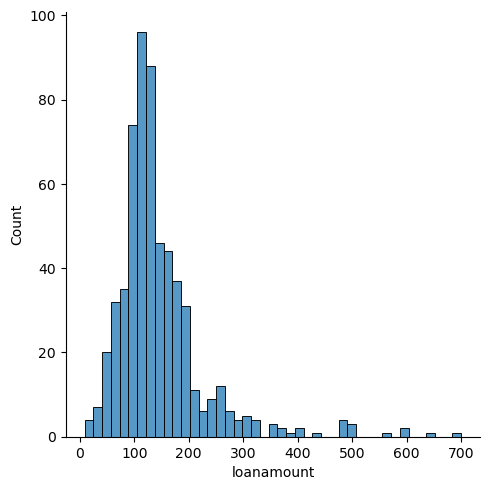

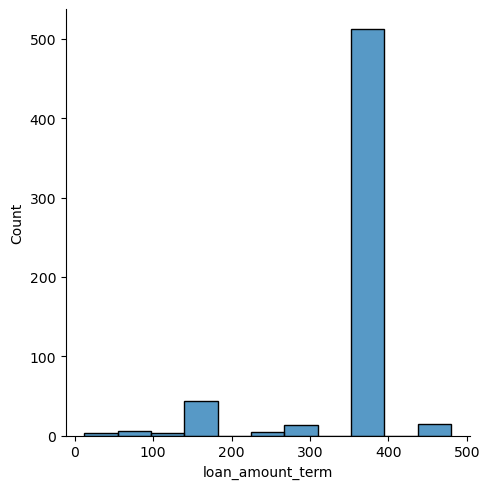

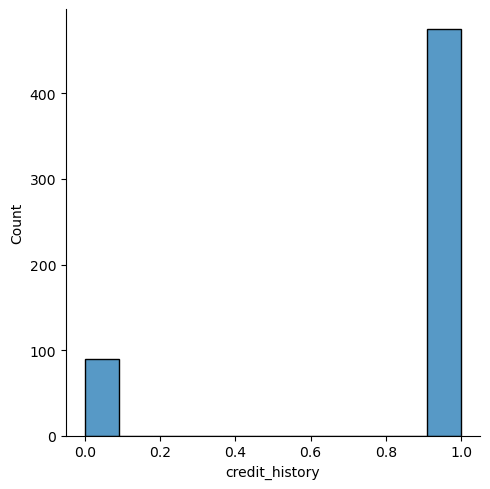

In [213]:
for col in data.select_dtypes('number'):
    sns.displot(data[col])

###### Loan_amount_history and credit_history are discrete while others are continuous in nature

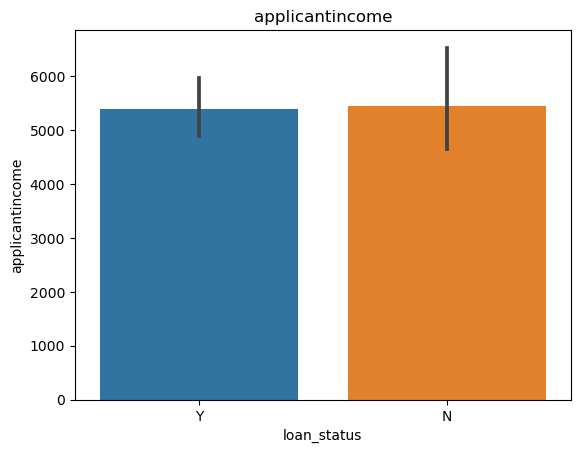

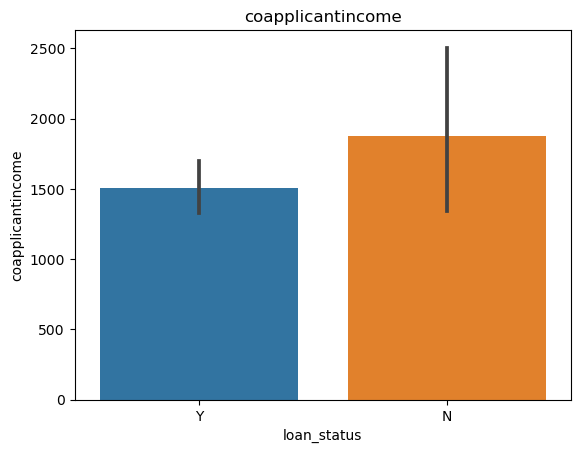

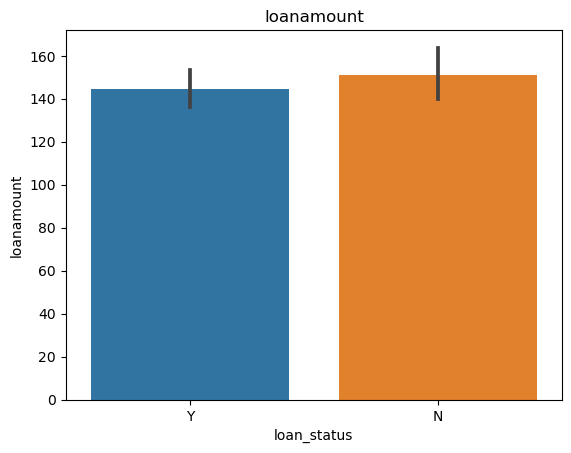

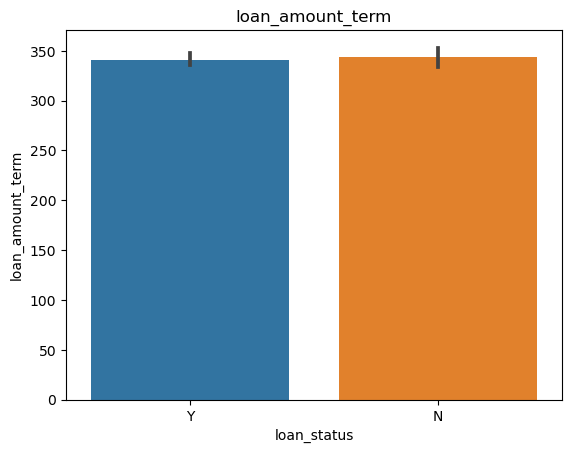

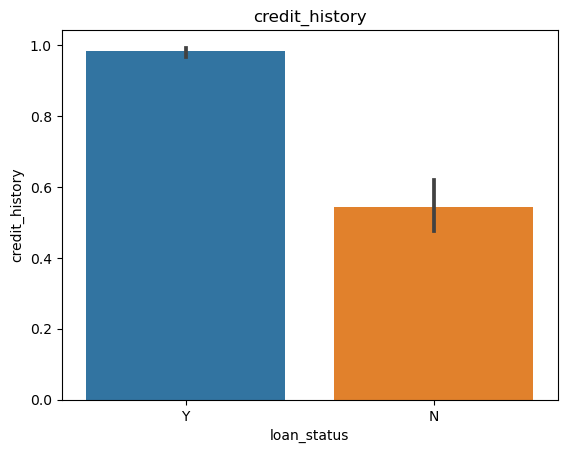

In [73]:
for col in data.select_dtypes('number'):
    sns.barplot(data=data, x="loan_status", y=col)
    plt.title(col)
    plt.show()

###### The most interesting feature is probably the credit history, The last graph indicates that there might be a big correaltion between having a credit history and getting a positive loan status.

### Lets dig further into the relation between loan_status and credit_history

<AxesSubplot:xlabel='loan_status', ylabel='count'>

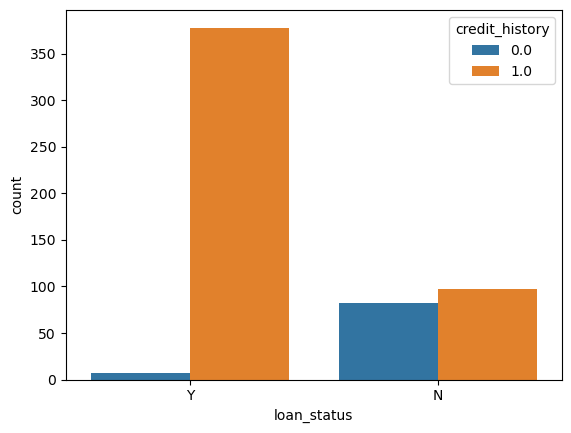

In [14]:
sns.countplot(data=data, x="loan_status", hue ="credit_history")

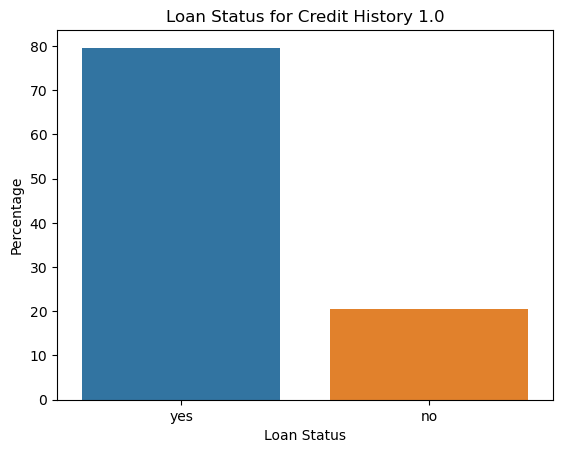

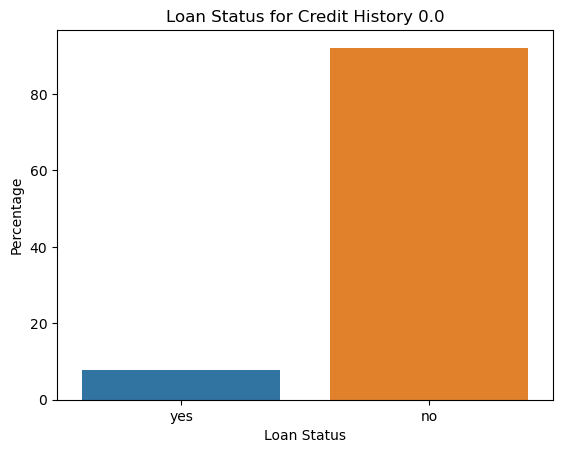

In [71]:
credit_history=[1.0,0.0]
for val in credit_history:    
    filtered_data = data[data['credit_history'] == val]
    per_yes = (len(filtered_data[filtered_data['loan_status'] == 'Y']) / len(filtered_data)) * 100
    per_no = (len(filtered_data[filtered_data['loan_status'] == 'N']) / len(filtered_data)) * 100
    plt.title("Loan Status for Credit History "+str(val))
    sns.barplot(x=['yes','no'],y=[per_yes,per_no])
    plt.xlabel("Loan Status")
    plt.ylabel("Percentage")
    plt.show()

###### This indicates that there is a big posibility of a negative loan status if the credit_history is 0, This clearly means that for a good model, the NA in credit history has be delt properly.

### Lets check for a relationship between categorical data and the target variable

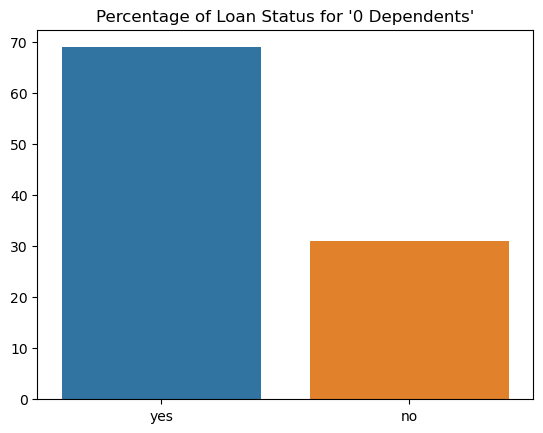

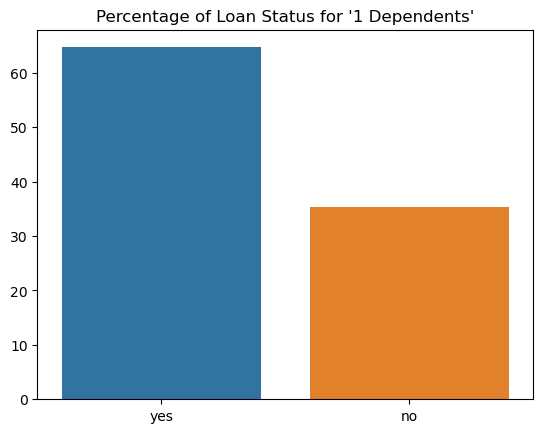

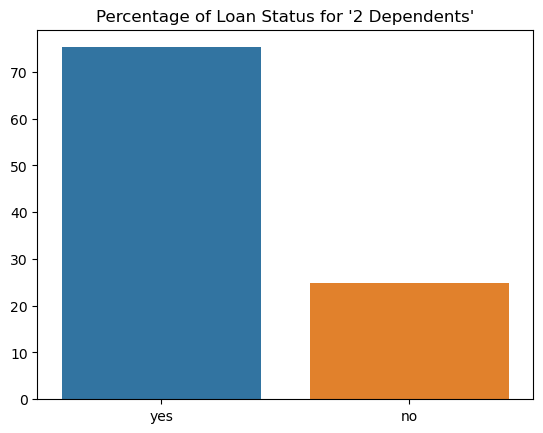

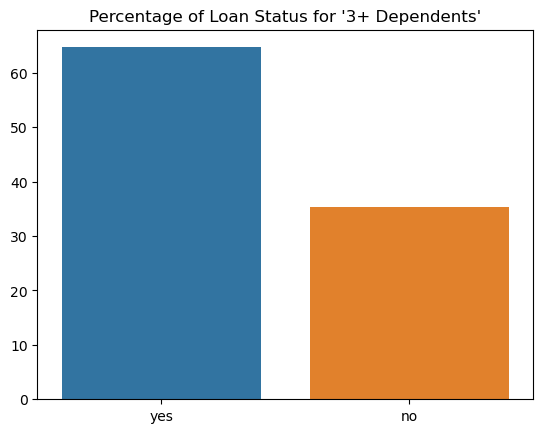

In [59]:
dependents_categories=['0','1','2','3+']
for i in dependents_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["dependents"] == i]
    percentage_yes = (len(dependent_data[dependent_data["loan_status"] == 'Y']) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["loan_status"] == 'N']) / len(dependent_data))*100
    sns.barplot(x=['yes', 'no'], y=[percentage_yes, percentage_no])
    plt.title(f"Percentage of Loan Status for '{i} Dependents'")
    plt.show()

###### In terms of percentage they all look the same

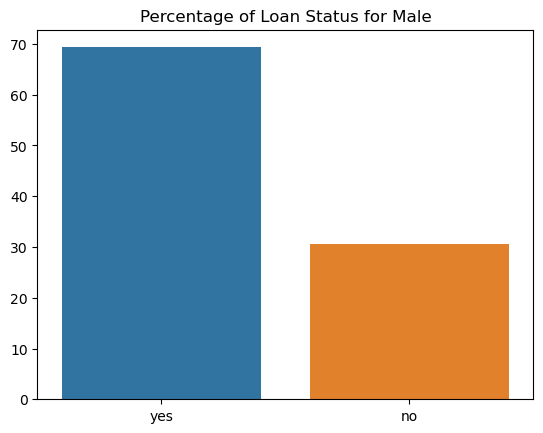

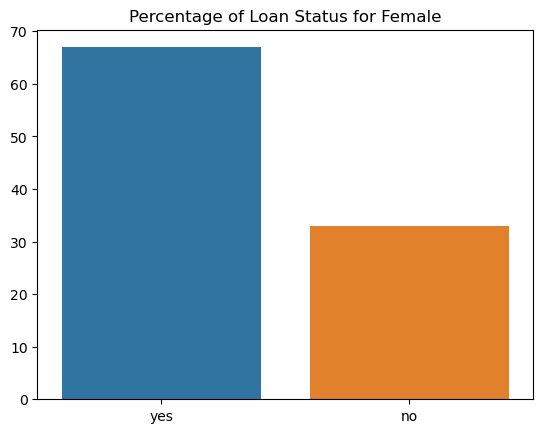

In [215]:
gender_categories=['Male','Female']
for i in gender_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["gender"] == i]
    percentage_yes = (len(dependent_data[dependent_data["loan_status"] == 'Y']) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["loan_status"] == 'N']) / len(dependent_data))*100
    sns.barplot(x=['yes', 'no'], y=[percentage_yes, percentage_no])
    plt.title(f"Percentage of Loan Status for {i}")
    plt.show()

###### In terms of percentage they look the same

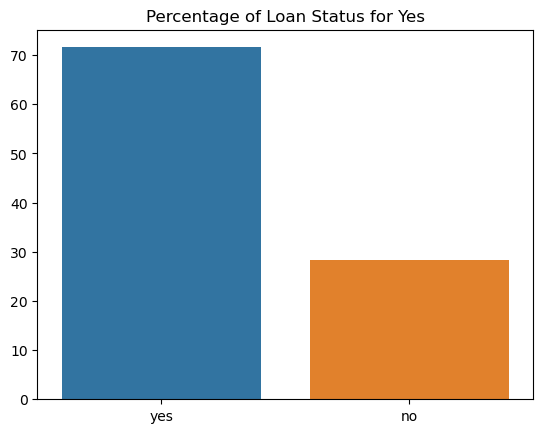

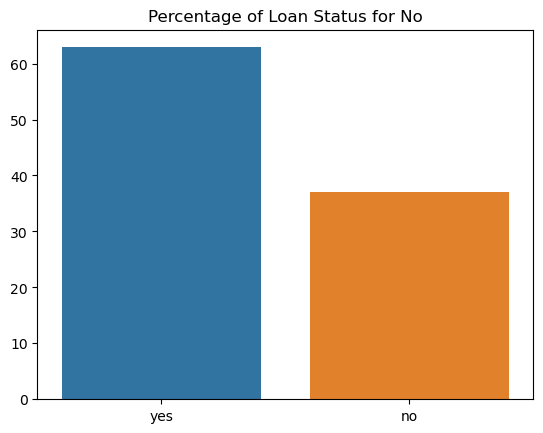

In [216]:
married_categories=['Yes','No']
for i in married_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["married"] == i]
    percentage_yes = (len(dependent_data[dependent_data["loan_status"] == 'Y']) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["loan_status"] == 'N']) / len(dependent_data))*100
    sns.barplot(x=['yes', 'no'], y=[percentage_yes, percentage_no])
    plt.title(f"Percentage of Loan Status for {i}")
    plt.show()

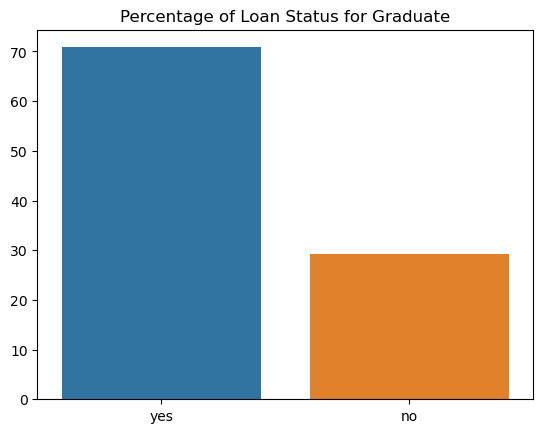

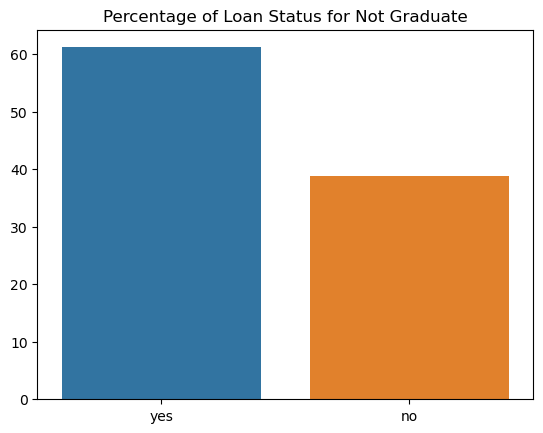

In [217]:
education_categories=['Graduate','Not Graduate']
for i in education_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["education"] == i]
    percentage_yes = (len(dependent_data[dependent_data["loan_status"] == 'Y']) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["loan_status"] == 'N']) / len(dependent_data))*100
    sns.barplot(x=['yes', 'no'], y=[percentage_yes, percentage_no])
    plt.title(f"Percentage of Loan Status for {i}")
    plt.show()

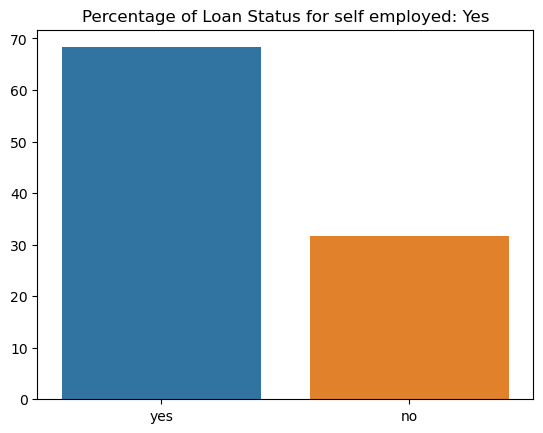

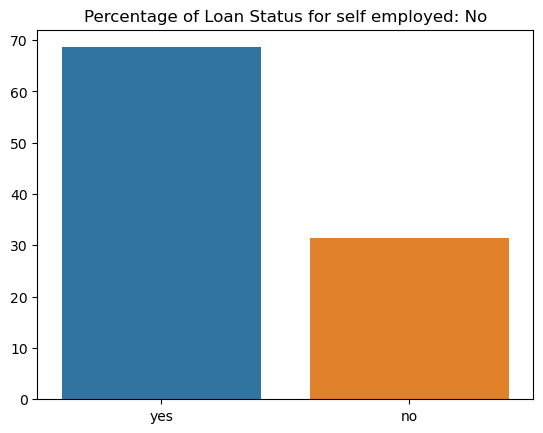

In [219]:
self_employed_categories=['Yes','No']
for i in self_employed_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["self_employed"] == i]
    percentage_yes = (len(dependent_data[dependent_data["loan_status"] == 'Y']) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["loan_status"] == 'N']) / len(dependent_data))*100
    sns.barplot(x=['yes', 'no'], y=[percentage_yes, percentage_no])
    plt.title(f"Percentage of Loan Status for self employed: {i}")
    plt.show()

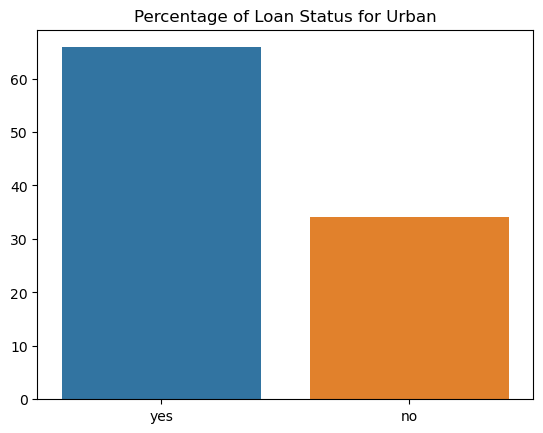

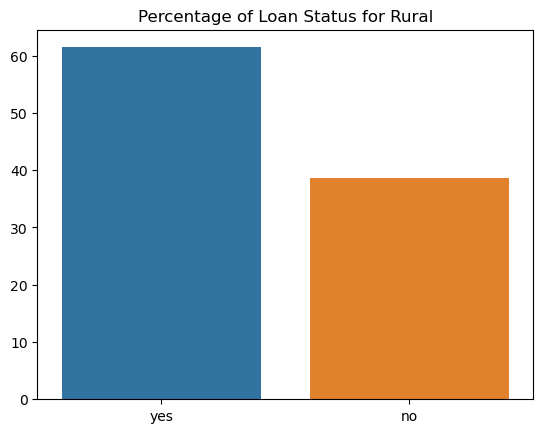

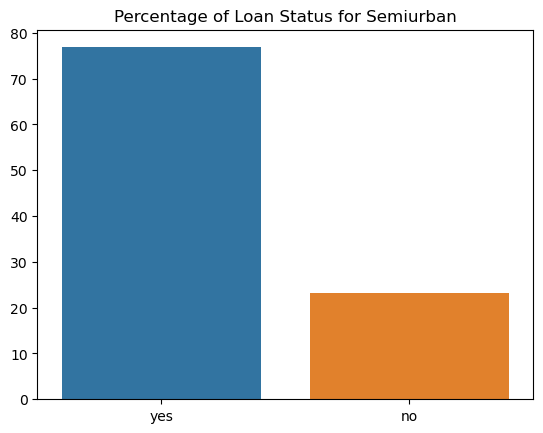

In [220]:
property_area_categories=['Urban','Rural','Semiurban']
for i in property_area_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["property_area"] == i]
    percentage_yes = (len(dependent_data[dependent_data["loan_status"] == 'Y']) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["loan_status"] == 'N']) / len(dependent_data))*100
    sns.barplot(x=['yes', 'no'], y=[percentage_yes, percentage_no])
    plt.title(f"Percentage of Loan Status for {i}")
    plt.show()

#### There is not a really big relation between the categorial data and the target. So far the only breakthrough is **"credit_history"** so lets work on removing the NA's from **"credit history"** 

### Relation between categorical data and credit_history:
#### We have already seen that there is not a really big correlation between numerical columns and credit_history.

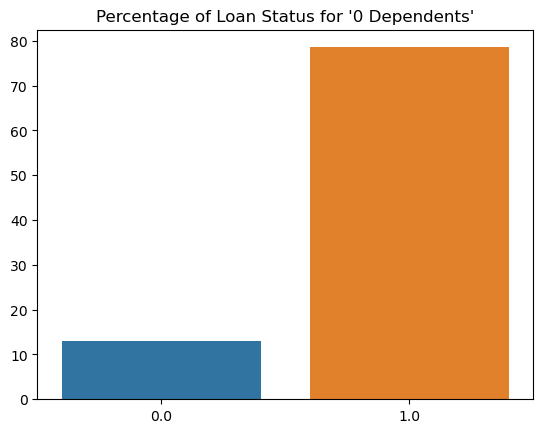

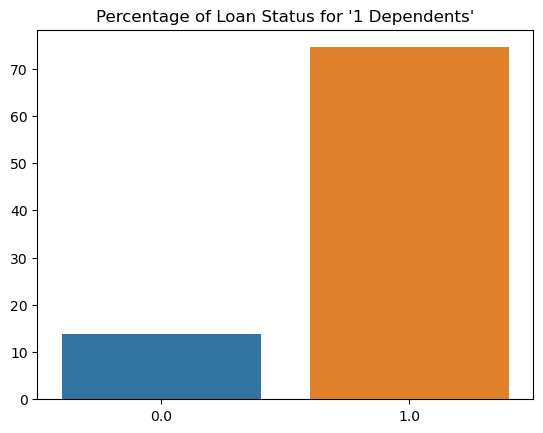

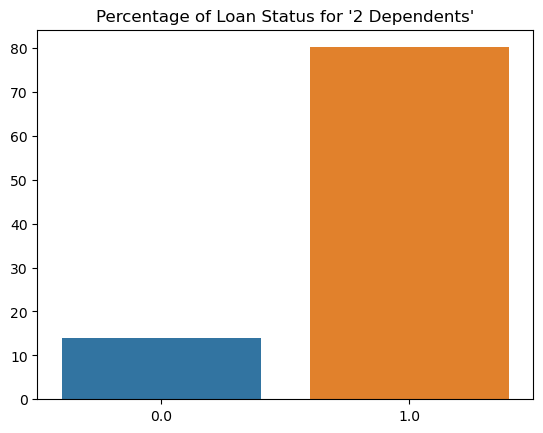

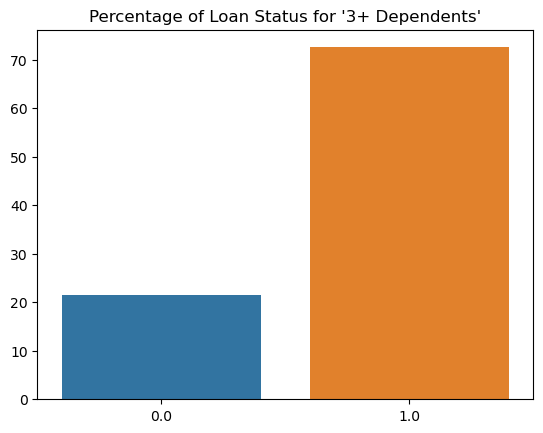

In [75]:
dependents_categories=['0','1','2','3+']
for i in dependents_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["dependents"] == i]
    percentage_yes = (len(dependent_data[dependent_data["credit_history"] == 1.0]) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["credit_history"] == 0.0]) / len(dependent_data))*100
    sns.barplot(x=[1.0, 0.0], y=[percentage_yes, percentage_no])
    plt.title(f"Percentage of Loan Status for '{i} Dependents'")
    plt.show()

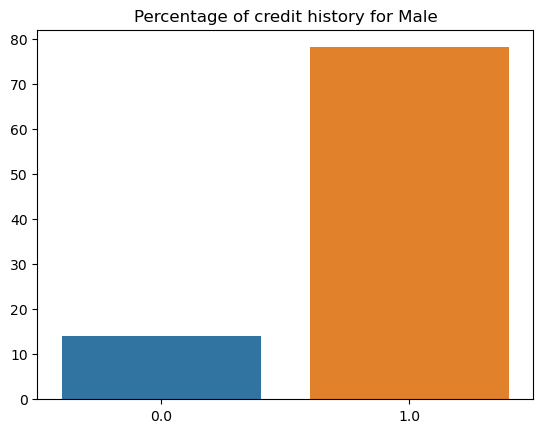

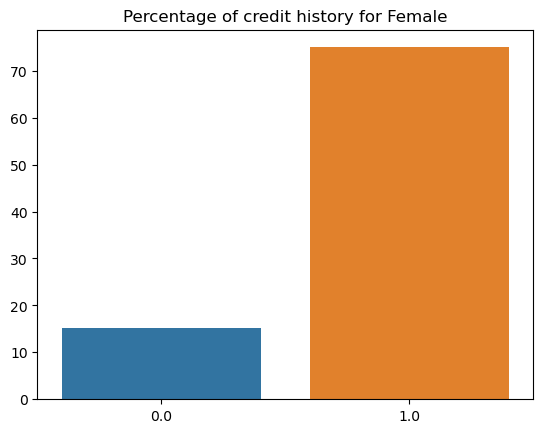

In [83]:
gender_categories=['Male','Female']
for i in gender_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["gender"] == i]
    percentage_yes = (len(dependent_data[dependent_data["credit_history"] == 1.0]) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["credit_history"] == 0.0]) / len(dependent_data))*100
    sns.barplot(x=[1.0, 0.0], y=[percentage_yes, percentage_no])
    plt.title("Percentage of credit history for "+i)
    plt.show()

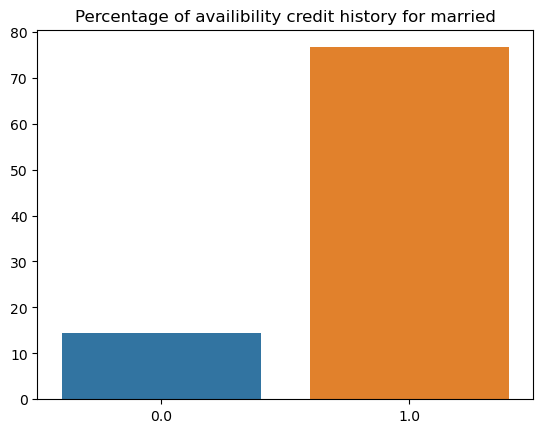

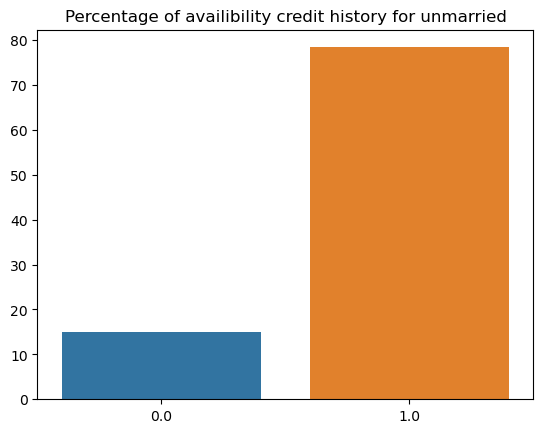

In [97]:
married_categories=['Yes','No']
for i in married_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["married"] == i]
    percentage_yes = (len(dependent_data[dependent_data["credit_history"] == 1.0]) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["credit_history"] == 0.0]) / len(dependent_data))*100
    sns.barplot(x=[1.0, 0.0], y=[percentage_yes, percentage_no])
    if i=="Yes":
        plt.title("Percentage of availibility credit history for married")
    else:
        plt.title("Percentage of availibility credit history for unmarried")
    plt.show()

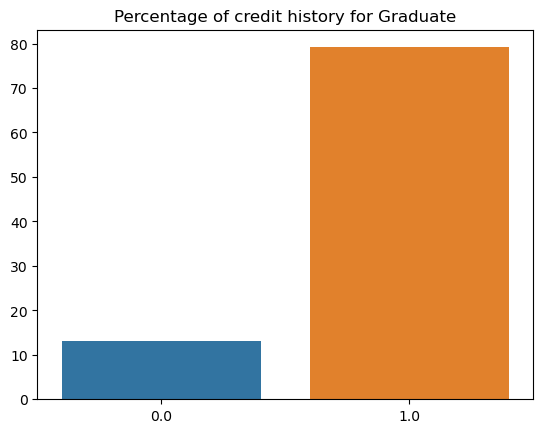

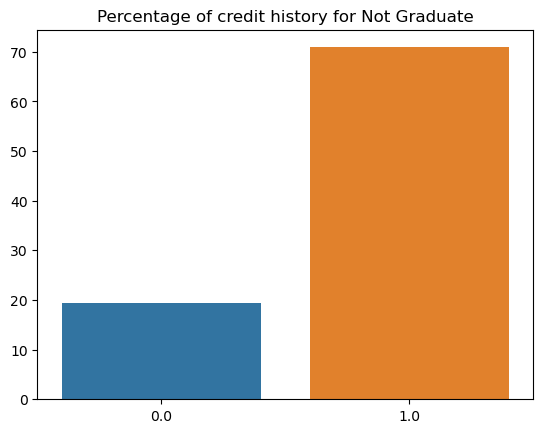

In [87]:
education_categories=['Graduate','Not Graduate']
for i in education_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["education"] == i]
    percentage_yes = (len(dependent_data[dependent_data["credit_history"] == 1.0]) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["credit_history"] == 0.0]) / len(dependent_data))*100
    sns.barplot(x=[1.0, 0.0], y=[percentage_yes, percentage_no])
    plt.title("Percentage of credit history for "+i)
    plt.show()

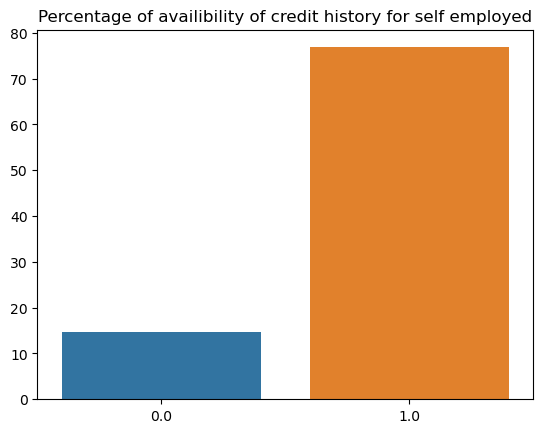

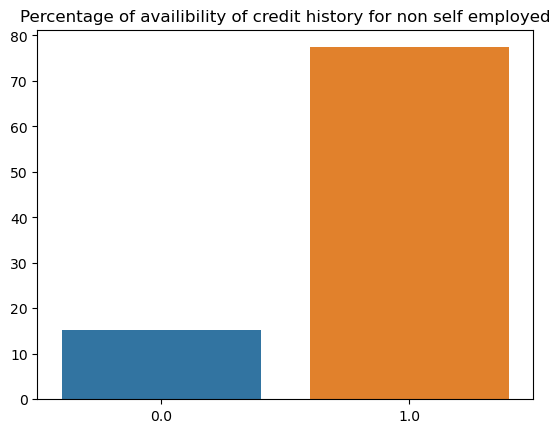

In [95]:
self_employed_categories=['Yes','No']
for i in self_employed_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["self_employed"] == i]
    percentage_yes = (len(dependent_data[dependent_data["credit_history"] == 1.0]) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["credit_history"] == 0.0]) / len(dependent_data))*100
    sns.barplot(x=[1.0, 0.0], y=[percentage_yes, percentage_no])
    if i=='Yes':
        plt.title("Percentage of availibility of credit history for self employed")
    else:
        plt.title("Percentage of availibility of credit history for non self employed")
    plt.show()

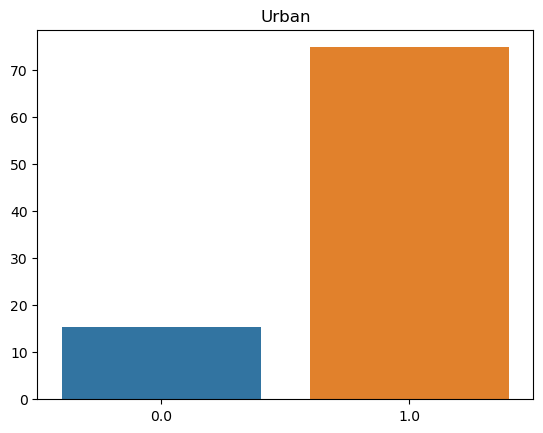

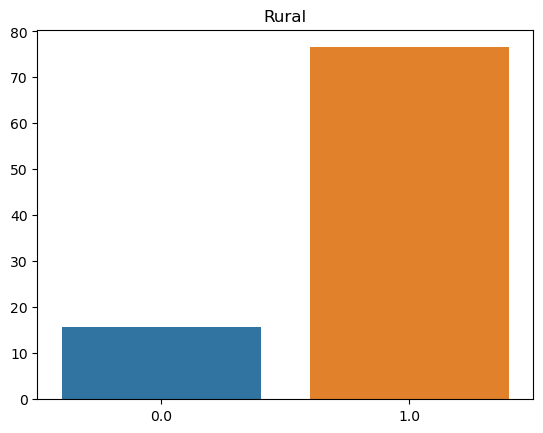

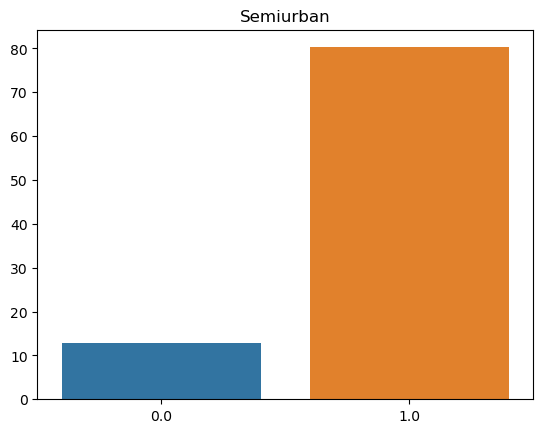

In [111]:
property_area_categories=['Urban','Rural','Semiurban']
for i in property_area_categories:
    # Filter the data for rows with the current dependents category
    dependent_data = data[data["property_area"] == i]
    percentage_yes = (len(dependent_data[dependent_data["credit_history"] == 1.0]) / len(dependent_data))*100
    percentage_no = (len(dependent_data[dependent_data["credit_history"] == 0.0]) / len(dependent_data))*100
    sns.barplot(x=[1.0, 0.0], y=[percentage_yes, percentage_no])
    plt.title(i)
    plt.show()

### Nothing conclusive to deduce a relationship between categorical columns and credit_history

### Lets try to plot the numerical data with respect to credit_history to visualize, if there is a somekind relation.

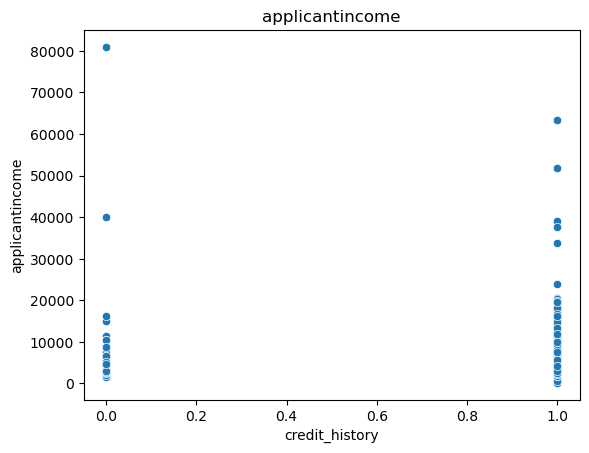

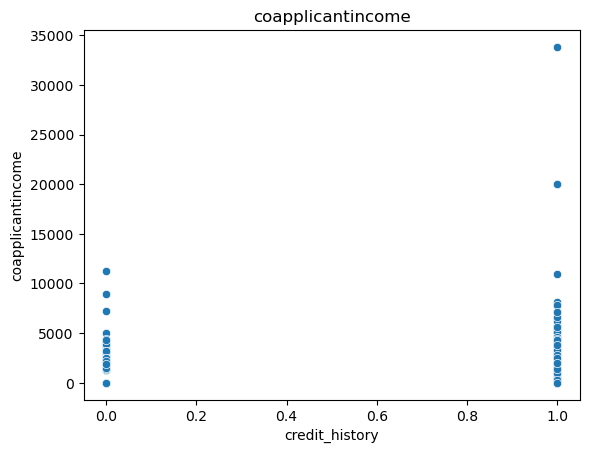

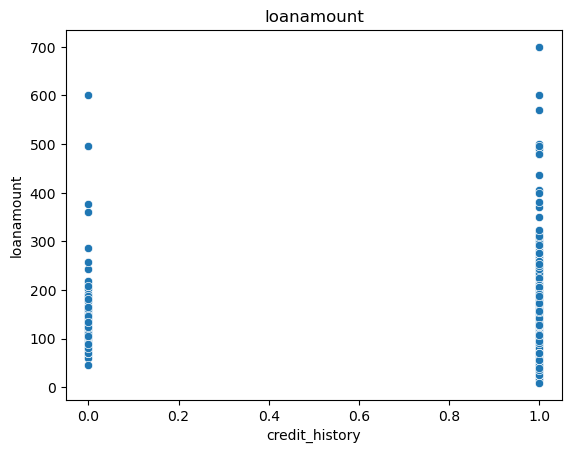

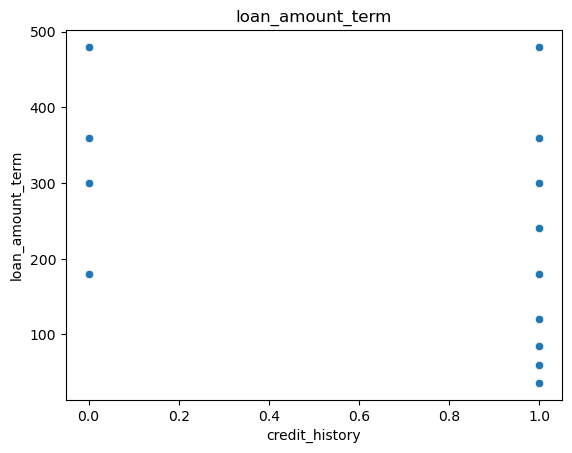

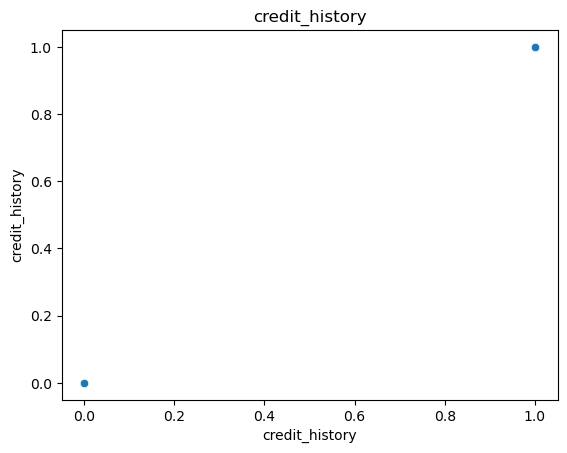

In [108]:
for col in data.select_dtypes('number'):
    sns.scatterplot(data=data,y=col,x='credit_history')
    plt.title(col)
    plt.show()

### Nothing deducible

# Data Cleaning and Training

## There are two approaches of cleaning this data set, from the EDA part we know that credit_history has a significant impact on the test variable, so it is rather important to fill the 8% NA;s in the credit_history column with something that represents the trend of the data.

## Test 1:
### Lets replace all the NA's in credit history where loan_status is "N" with 0.0 and remove the other rows with NA's. The NA's of other numerical data can be filled with median and and the NA's of the categorical column can be filled with the mode

## Test 2:
### Lets replace all the NA's in credit history where loan_status is "N" with 0.0 and the other NA's by the mode of credit_history. The NA's of other numerical data can be filled with median and and the NA's of the categorical column can be filled with the mode


# Test 1

In [150]:
data_test=data.copy()

In [151]:
data_test.loc[data_test["loan_status"]=='N','credit_history']=data_test.loc[data_test["loan_status"]=='N','credit_history'].fillna(0.0)

In [153]:
data_test.dropna(subset='credit_history', inplace=True)

In [156]:
data_test.shape

(577, 13)

In [158]:
data_test['gender'].fillna(data_test['gender'].mode()[0], inplace=True)

In [160]:
data_test['married'].fillna(data_test['married'].mode()[0], inplace=True)

In [161]:
data_test['dependents'].fillna(data_test['dependents'].mode()[0], inplace=True)

In [162]:
data_test['self_employed'].fillna(data_test['self_employed'].mode()[0], inplace=True)

In [164]:
data_test['loanamount'].fillna(data_test['loanamount'].median(), inplace=True)

In [165]:
data_test['loan_amount_term'].fillna(data_test['loan_amount_term'].median(), inplace=True)

In [175]:
data_test=data_test.drop('loan_id',axis=1)

In [177]:
y = data_test['loan_status']
X = data_test.drop('loan_status', axis=1)

In [180]:
X = pd.get_dummies(X, columns=['gender', 'married', 'dependents','education','self_employed','property_area'], drop_first=True)
X

applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     credit_history  gender_Male  married_Yes  dependents_1  dependents_2  \
0               1.0            1            0             0             0   
1               1.0            1            1             1             0   
2               1.0            1            1             0             0   
3               1.0            1            1             0             0   
4               1.0            1            0             0             0   
..              ...          ...          ...           ...           ...   
609             1.0            0            0             0             0   
610             1.0            1            1             0             0   
611             1.0            1            1             1             0   
612             1.0            1            1             0             1   
613             0.0            0            0             0             0   

     dependents_3+  education_Not Graduate  self_employed_Yes  \
0                0                       0                  0   
1                0                       0                  0   
2                0                       0                  1   
3                0                       1                  0   
4                0                       0                  0   
..             ...                     ...                ...   
609              0                       0                  0   
610              1                       0                  0   
611              0                       0                  0   
612              0                       0                  0   
613              0                       0                  1   

     property_area_Semiurban  property_area_Urban  
0                          0                    1  
1                          0                    0  
2                          0                    1  
3                          0                    1  
4                          0                    1  
..                       ...                  ...  
609                        0                    0  
610                        0                    0  
611                        0                    1  
612                        0                    1  
613                        1                    0  

[577 rows x 14 columns]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
classification = LogisticRegression(random_state=42)

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [184]:
classification.score(X_test, y_test)

0.7327586206896551

In [185]:
predictions = classification.predict(X_test)
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y'],
      dtype=object)

In [186]:
confusion_matrix(y_test, predictions)

array([[20, 26],
       [ 5, 65]], dtype=int64)

<AxesSubplot:>

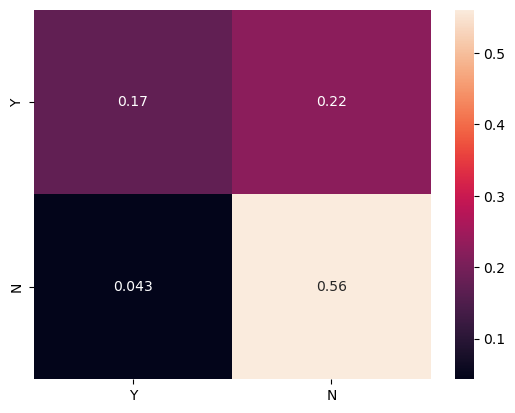

In [189]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["Y", "N"], yticklabels=["Y", "N"])

# Test 2

In [190]:
data_test_2=data.copy()

In [193]:
data_test_2.loc[data_test_2["loan_status"]=='N','credit_history']=data_test_2.loc[data_test_2["loan_status"]=='N','credit_history'].fillna(0.0)

In [195]:
data_test_2.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       37
property_area         0
loan_status           0
dtype: int64

In [197]:
data_test_2['gender'].fillna(data_test_2['gender'].mode()[0], inplace=True)
data_test_2['married'].fillna(data_test_2['married'].mode()[0], inplace=True)
data_test_2['married'].fillna(data_test_2['married'].mode()[0], inplace=True)
data_test_2['dependents'].fillna(data_test_2['dependents'].mode()[0], inplace=True)
data_test_2['self_employed'].fillna(data_test_2['self_employed'].mode()[0], inplace=True)
data_test_2['self_employed'].fillna(data_test_2['self_employed'].mode()[0], inplace=True)
data_test_2['loanamount'].fillna(data_test_2['loanamount'].median(), inplace=True)
data_test_2['loanamount'].fillna(data_test_2['loanamount'].median(), inplace=True)
data_test_2['loan_amount_term'].fillna(data_test_2['loan_amount_term'].median(), inplace=True)
data_test_2=data_test_2.drop('loan_id',axis=1)

In [198]:
data_test_2['credit_history'].fillna(data_test_2['credit_history'].mode()[0], inplace=True)

In [199]:
y = data_test_2['loan_status']
X = data_test_2.drop('loan_status', axis=1)

In [200]:
X = pd.get_dummies(X, columns=['gender', 'married', 'dependents','education','self_employed','property_area'], drop_first=True)
X

applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     credit_history  gender_Male  married_Yes  dependents_1  dependents_2  \
0               1.0            1            0             0             0   
1               1.0            1            1             1             0   
2               1.0            1            1             0             0   
3               1.0            1            1             0             0   
4               1.0            1            0             0             0   
..              ...          ...          ...           ...           ...   
609             1.0            0            0             0             0   
610             1.0            1            1             0             0   
611             1.0            1            1             1             0   
612             1.0            1            1             0             1   
613             0.0            0            0             0             0   

     dependents_3+  education_Not Graduate  self_employed_Yes  \
0                0                       0                  0   
1                0                       0                  0   
2                0                       0                  1   
3                0                       1                  0   
4                0                       0                  0   
..             ...                     ...                ...   
609              0                       0                  0   
610              1                       0                  0   
611              0                       0                  0   
612              0                       0                  0   
613              0                       0                  1   

     property_area_Semiurban  property_area_Urban  
0                          0                    1  
1                          0                    0  
2                          0                    1  
3                          0                    1  
4                          0                    1  
..                       ...                  ...  
609                        0                    0  
610                        0                    0  
611                        0                    1  
612                        0                    1  
613                        1                    0  

[614 rows x 14 columns]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
classification = LogisticRegression(random_state=42)

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [203]:
classification.score(X_test, y_test)

0.8211382113821138

In [204]:
predictions = classification.predict(X_test)
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [205]:
confusion_matrix(y_test, predictions)

array([[22, 21],
       [ 1, 79]], dtype=int64)

<AxesSubplot:>

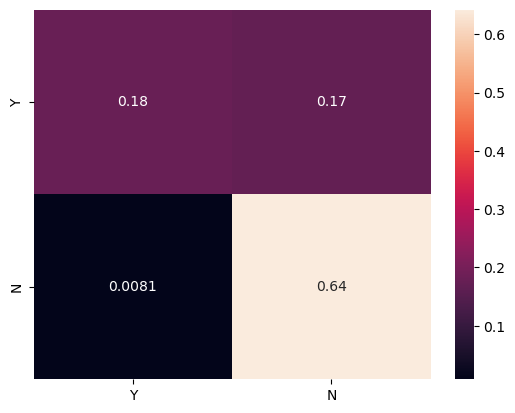

In [207]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["Y", "N"], yticklabels=["Y", "N"])

# Conclusion
## Model 2 has the higher score of 0.82 probably because it retained the entire data set compared to Model 1.
## The confusion matrix shows that both the models are more skewed towards labelling "N" with a significantly high false "N"
## So it seems like these models are quite cautious towards granting a loan with quite low true "Y" and minuscule false "Y"  